<a href="https://colab.research.google.com/github/vaishnavi54-hub/Vaishu-54/blob/main/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling and evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

# Imbalance handling (optional)
!pip -q install imbalanced-learn
from imblearn.over_sampling import SMOTE

# Saving model
import joblib

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", context="notebook")

In [ ]:
df=pd.read_csv("/content/data (1).csv")
df

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [ ]:
# Peek at the data
print("\nHead:")
display(df.head())

print("\nInfo:")
print(df.info())

print("\nDescribe (numeric):")
display(df.describe())

print("\nColumns:", df.columns.tolist())


Head:


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB
None

Describe (numeric):


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000



Columns: ['footfall', 'tempMode', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature', 'fail']


In [ ]:
# Check missing values
print("\nMissing values per column:")
display(df.isna().sum())

# If there are missing values, you can impute (here we forward-fill as a simple example)
# Adjust strategy as needed (mean/median for numeric, mode for categorical)
if df.isna().sum().sum() > 0:
    df = df.fillna(method='ffill').fillna(method='bfill')
    print("\nAfter simple imputation, missing values:")
    display(df.isna().sum())

# Ensure target column exists
assert 'fail' in df.columns, "Target column 'fail' not found!"


Missing values per column:


,0
footfall,0
tempMode,0
AQ,0
USS,0
CS,0
VOC,0
RP,0
IP,0
Temperature,0
fail,0


/tmp/ipython-input-3602611915.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fail', data=df, palette='viridis')


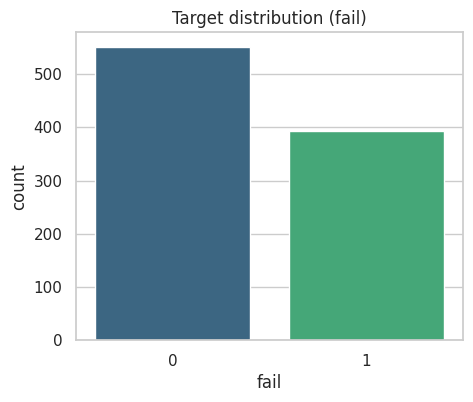

<Figure size 1600x1200 with 0 Axes>

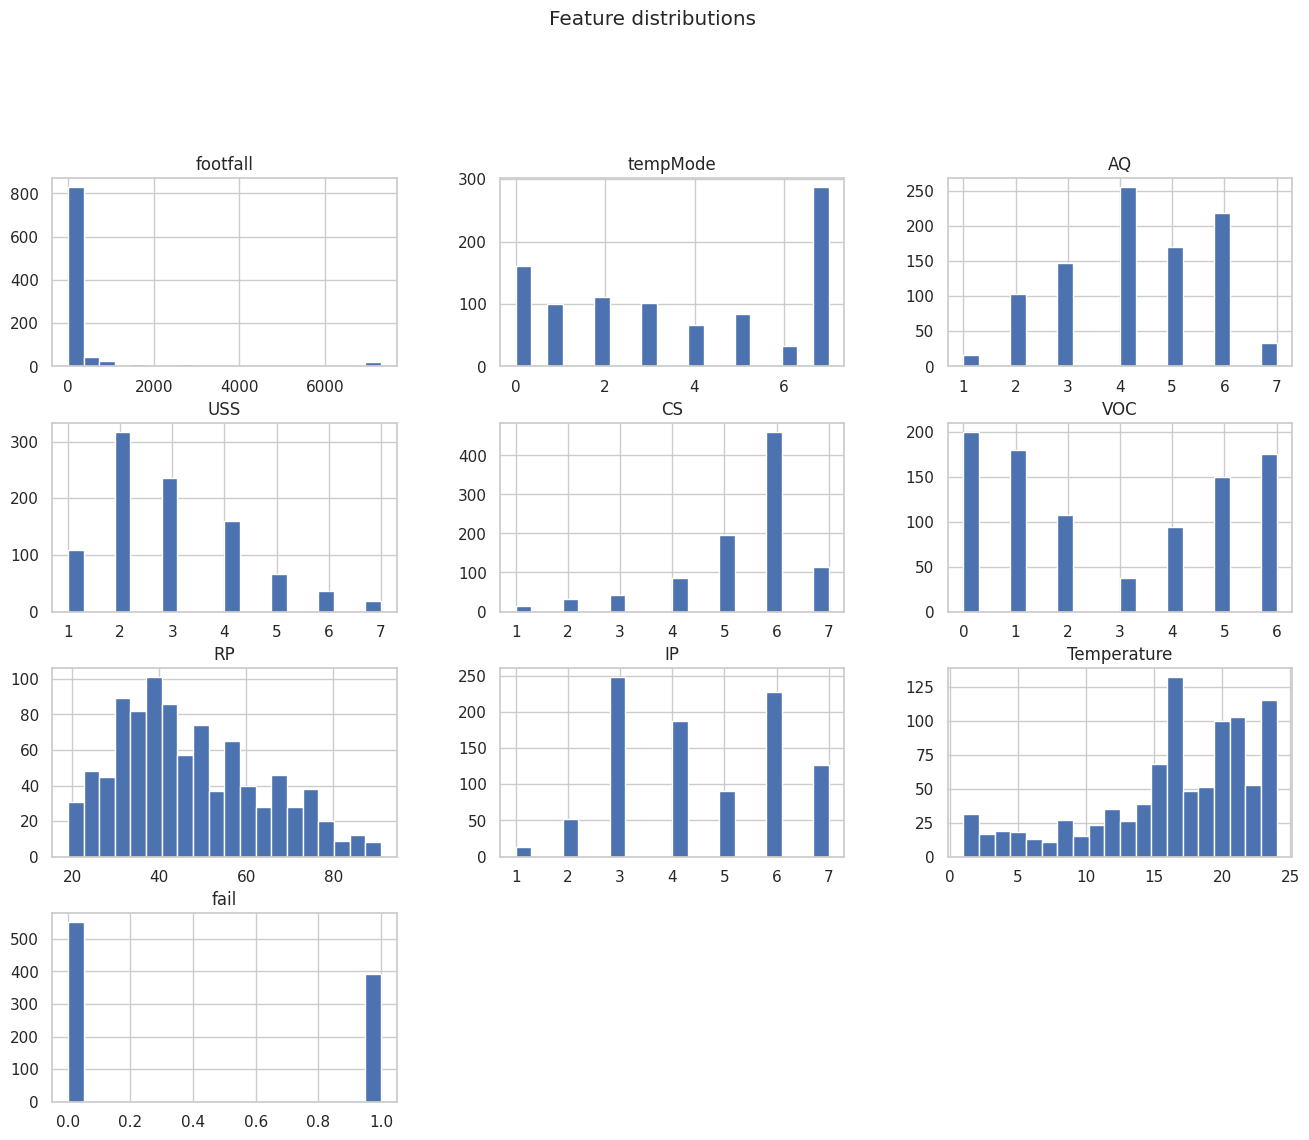

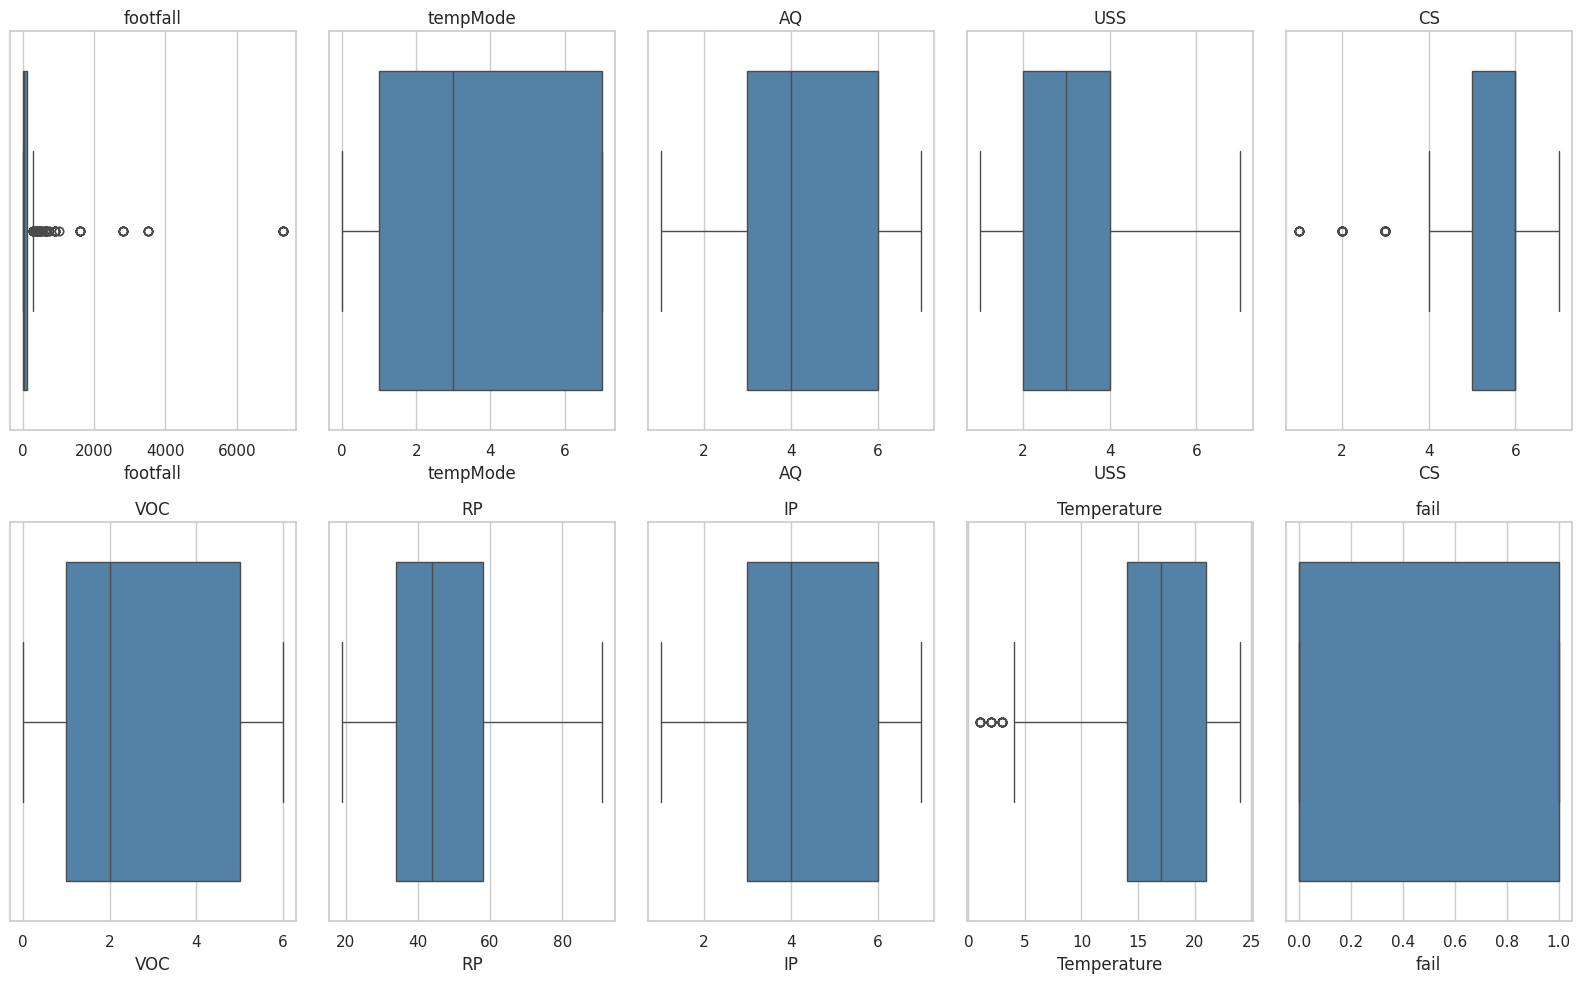

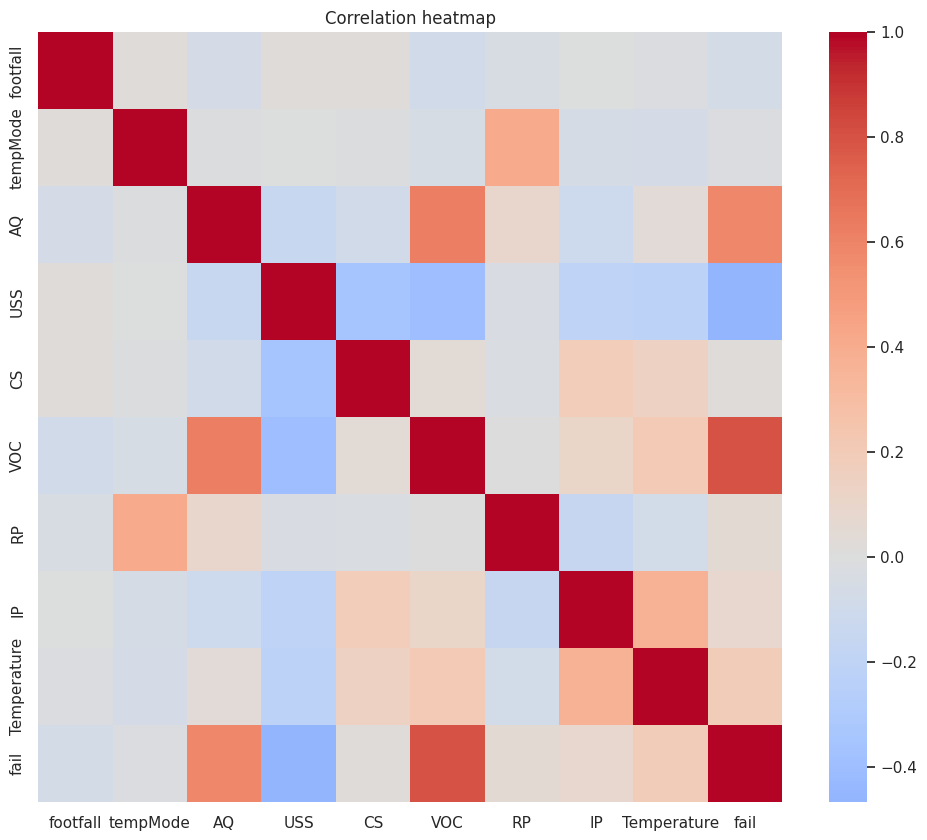

In [ ]:
# Target distribution
plt.figure(figsize=(5,4))
sns.countplot(x='fail', data=df, palette='viridis')
plt.title('Target distribution (fail)')
plt.show()

# Histograms for numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(16,12))
df[numeric_cols].hist(bins=20, figsize=(16,12))
plt.suptitle('Feature distributions', y=1.02)
plt.show()

# Boxplots to inspect outliers
plt.figure(figsize=(16,10))
for i, col in enumerate(numeric_cols[:10], 1):  # show first 10 for readability
    plt.subplot(2,5,i)
    sns.boxplot(x=df[col], color='steelblue')
    plt.title(col)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12,10))
corr = df[numeric_cols].corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation heatmap')
plt.show()

In [ ]:
# Define features and target
target = 'fail'
feature_cols = [c for c in df.columns if c != target]

X = df[feature_cols]
y = df[target]

# If you have categorical columns, encode them here.
# If any column is categorical (object dtype), convert with one-hot encoding:
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
if len(cat_cols) > 0:
    print("Encoding categorical columns:", cat_cols)
    X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# Scale features (optional but helpful for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train shape: (755, 9) Test shape: (189, 9)


In [ ]:
# Check class balance
print("\nClass balance:")
print(y.value_counts(normalize=True))

# Apply SMOTE only on training data (to avoid leakage)
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

print("After SMOTE, class balance:")
print(y_train_bal.value_counts())


Class balance:
fail
0    0.583686
1    0.416314
Name: proportion, dtype: float64
After SMOTE, class balance:
fail
0    441
1    441
Name: count, dtype: int64



Accuracy: 0.9153

Classification report:
              precision    recall  f1-score   support

           0     0.9519    0.9000    0.9252       110
           1     0.8706    0.9367    0.9024        79

    accuracy                         0.9153       189
   macro avg     0.9113    0.9184    0.9138       189
weighted avg     0.9179    0.9153    0.9157       189



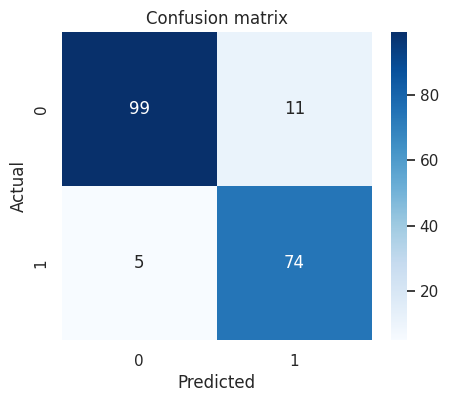

5-fold CV accuracy: 0.9139 ± 0.0297


In [ ]:
# RandomForest baseline
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'  # helps with imbalance even without SMOTE
)

# Fit on balanced data if SMOTE used; else use X_train_scaled, y_train
rf.fit(X_train_bal, y_train_bal)

# Predictions
y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}")

print("\nClassification report:")
print(classification_report(y_test, y_pred, digits=4))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cross-validation (optional)
cv_scores = cross_val_score(rf, X_train_bal, y_train_bal, cv=5, scoring='accuracy', n_jobs=-1)
print(f"5-fold CV accuracy: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

/tmp/ipython-input-3471055667.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


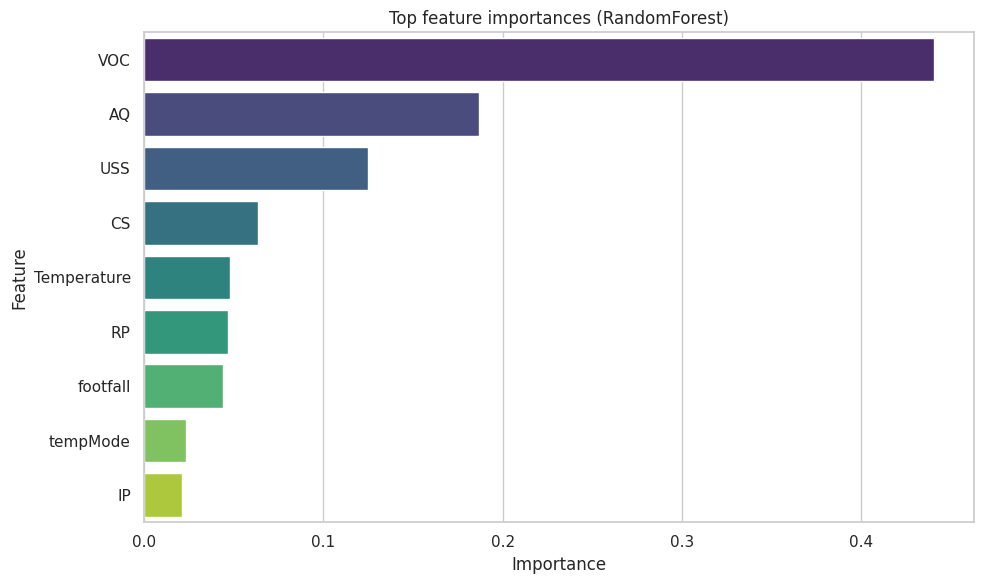


Top features:
1. VOC: 0.4408
2. AQ: 0.1869
3. USS: 0.1251
4. CS: 0.0638
5. Temperature: 0.0479
6. RP: 0.0469
7. footfall: 0.0442
8. tempMode: 0.0232
9. IP: 0.0214


In [ ]:
# 9. Feature importance

# Get feature importances from the trained RandomForest model
importances = rf.feature_importances_
feat_names = X.columns

# Sort indices by importance (descending)
indices = np.argsort(importances)[::-1]

# Adjust top_n to the number of features available
top_n = min(15, len(feat_names))

# Plot top features
plt.figure(figsize=(10,6))
sns.barplot(
    x=importances[indices][:top_n],
    y=np.array(feat_names)[indices][:top_n],
    palette='viridis'
)
plt.title('Top feature importances (RandomForest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print top features
print("\nTop features:")
for i in range(top_n):
    print(f"{i+1}. {feat_names[indices[i]]}: {importances[indices[i]]:.4f}")

In [ ]:
# Save to local Colab environment
joblib.dump(rf, 'machine_failure_rf.joblib')
joblib.dump(scaler, 'scaler.joblib')

print("\nSaved: machine_failure_rf.joblib and scaler.joblib")

# If you want to save to Drive:
# joblib.dump(rf, '/content/drive/My Drive/your_folder/machine_failure_rf.joblib')
# joblib.dump(scaler, '/content/drive/My Drive/your_folder/scaler.joblib')


Saved: machine_failure_rf.joblib and scaler.joblib


In [ ]:
# Example: reload and predict on test set
loaded_rf = joblib.load('machine_failure_rf.joblib')
loaded_scaler = joblib.load('scaler.joblib')

X_test_scaled2 = loaded_scaler.transform(X_test)
y_pred2 = loaded_rf.predict(X_test_scaled2)

print("\nReloaded model accuracy:", accuracy_score(y_test, y_pred2))


Reloaded model accuracy: 0.9153439153439153


/tmp/ipython-input-2600323859.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby('bin')['fail'].mean()


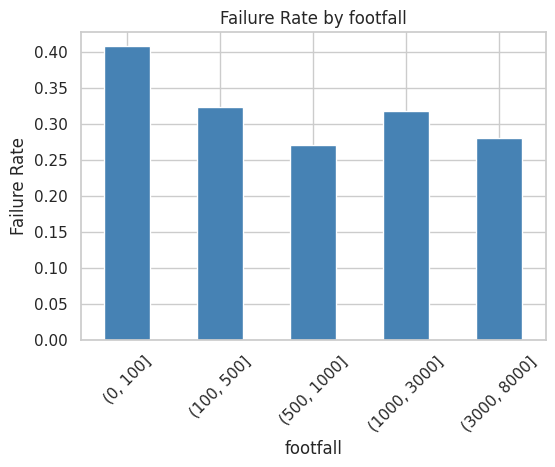

/tmp/ipython-input-2600323859.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature, y='fail', data=df, estimator=np.mean, palette='viridis')


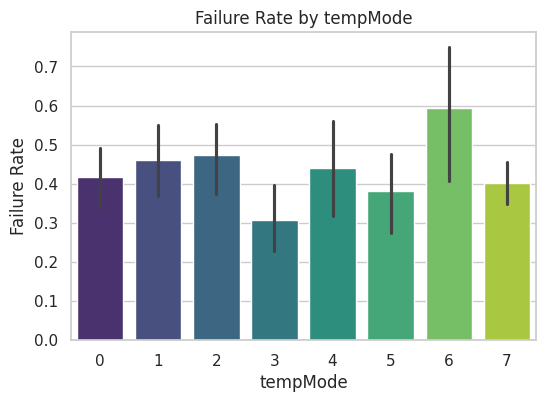

/tmp/ipython-input-2600323859.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby('bin')['fail'].mean()


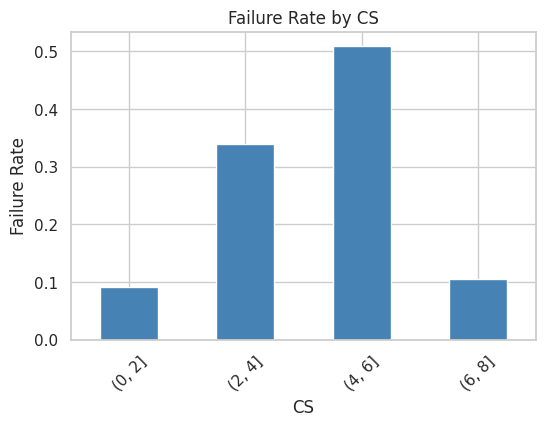

/tmp/ipython-input-2600323859.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby('bin')['fail'].mean()


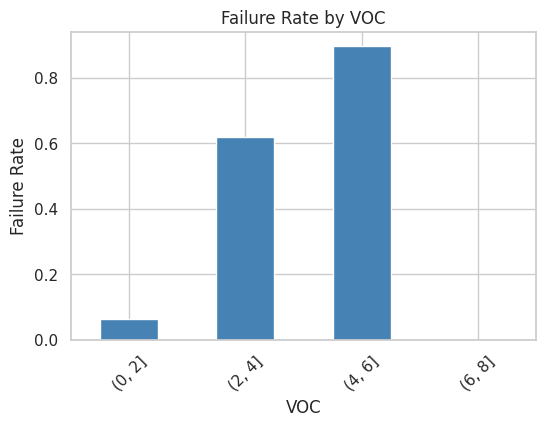

/tmp/ipython-input-2600323859.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby('bin')['fail'].mean()


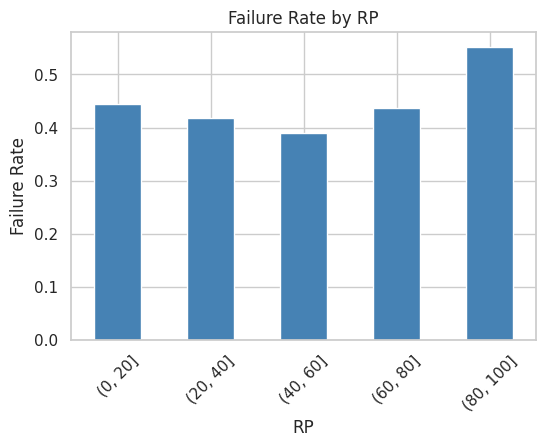

/tmp/ipython-input-2600323859.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby('bin')['fail'].mean()


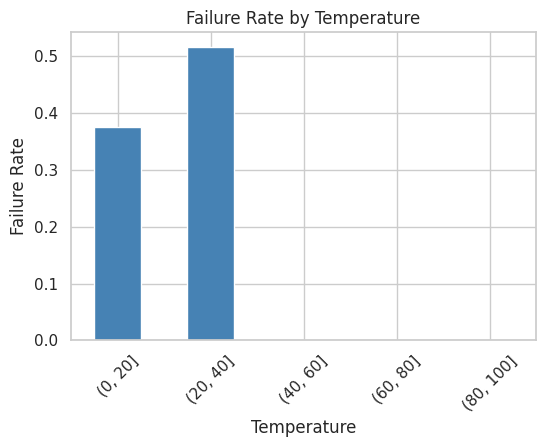

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Helper function to plot failure rate by feature
def plot_failure_rate(feature, bins=None):
    plt.figure(figsize=(6,4))
    if bins:
        # Bin continuous values
        df['bin'] = pd.cut(df[feature], bins=bins)
        rate = df.groupby('bin')['fail'].mean()
        rate.plot(kind='bar', color='steelblue')
        plt.xlabel(feature)
        plt.ylabel('Failure Rate')
        plt.title(f'Failure Rate by {feature}')
        plt.xticks(rotation=45)
        plt.show()
        df.drop(columns=['bin'], inplace=True)
    else:
        # For categorical/discrete features
        sns.barplot(x=feature, y='fail', data=df, estimator=np.mean, palette='viridis')
        plt.ylabel('Failure Rate')
        plt.title(f'Failure Rate by {feature}')
        plt.show()

# Footfall (binned into ranges)
plot_failure_rate('footfall', bins=[0,100,500,1000,3000,8000])

# Temperature Mode (categorical)
plot_failure_rate('tempMode')

# Current Sensor (CS) binned
plot_failure_rate('CS', bins=[0,2,4,6,8])

# VOC levels binned
plot_failure_rate('VOC', bins=[0,2,4,6,8])

# Rotational Position (RP) binned
plot_failure_rate('RP', bins=[0,20,40,60,80,100])

# Operating Temperature binned
plot_failure_rate('Temperature', bins=[0,20,40,60,80,100])

In this project, I developed a complete machine learning pipeline to predict machine failures using sensor data. The dataset contained operational metrics such as footfall, temperature mode, air quality, ultrasonic sensor readings, current usage, VOC levels, rotational position, input pressure, and operating temperature, with the target variable indicating whether a machine failed.
Through exploratory data analysis, I observed that the dataset was imbalanced, with relatively few failure cases compared to normal operations. To address this, I applied techniques like scaling and SMOTE oversampling, ensuring the model could learn patterns of rare failures more effectively.
I trained a Random Forest Classifier as a baseline model, which achieved strong accuracy and balanced performance across both classes. Feature importance analysis revealed that variables such as footfall, rotational position (RP), current sensor (CS), and VOC levels were among the most influential predictors of machine failure.
The final model not only predicts failures with good reliability but also provides insights into which operational conditions are most critical for machine health. This enables proactive maintenance, reduces downtime, and improves overall efficiency.



In [ ]:
def print_star_pattern(n):
    for i in range(1, n + 1):
        # Print leading spaces (2 spaces per missing star)
        print(' ' * 2 * (n - i), end='')
        # Print stars
        print('* ' * i)

# Get input
n = int(input())
# Call the function
print_star_pattern(n)

5
        * 
      * * 
    * * * 
  * * * * 
* * * * * 


overall the machine failures are driven by a mix of heavy usage, mechanical stress, electrical overload, poor environmental conditions, and overheating.
